In [3]:
#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un fichier __init__.py 
#et également l'ajouter au PATH

import sys
sys.path.insert(0, "/home/apprenant/simplon_project/American_dream/")

import sqlalchemy
#On peut ensuite importer le dossier comme un module

from src.d00_utils.mysql_utils import mysql_connect, save_to_mysql

#Et utiliser les fonctions qu'il contient
#dans l'exemple on a défini la fonction plus_cinq dans le fichier load data 
# du sous module d01_data( qui contient également un fichier __init__.py)

# import des modules data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
conn = mysql_connect()
df1 = pd.read_sql("SELECT * FROM df1_intermediate WHERE Country = 'United States'", conn)
df1.head()

,level_0,index,SalaryUSD,Country,PostalCode,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,CompanyEmployeesOverall,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties
0,0,0,115000.0,United States,03,Full time employee,DBA (Production Focus - build & troubleshoot s...,No,5,1 (this is the only company where I've had thi...,2,Not Asked,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked
1,1,1,100000.0,United States,None,Full time employee,"Developer: App code (C#, JS, etc)",No,6,1 (this is the only company where I've had thi...,More than 5,Not Asked,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked
2,3,3,70000.0,United States,94133,Full time employee,Analyst,No,3,1 (this is the only company where I've had thi...,2,Not Asked,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked
3,4,4,110000.0,United States,95354,Full time employee,DBA (General - splits time evenly between writ...,No,25,3,None,Not Asked,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked
4,5,5,79500.0,United States,78727,Full time employee,Analyst,No,2,1 (this is the only company where I've had thi...,None,Not Asked,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked


In [8]:
def make_barplot(title, series, size=(10,6)):
    plt.figure(figsize=size)
    plt.title(title)
    return sns.barplot(x=series.index, y=series.values)

# Function for formatting salary on "xK $"
def to_k_usd(x):
    return str(int((x / 1000))) + "K $"

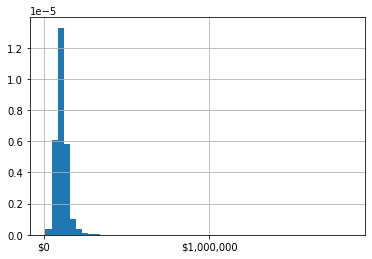

In [10]:

# sous la forme d'histogramme
ax=df1["SalaryUSD"].hist(density=True,bins=50)

# on change le format de l'axe x
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

# On modifie le nombre de valeur affichézs sur les axes x et y
ax.locator_params(axis="x", nbins=3)
ax.locator_params(axis="y", nbins=10)
plt.show()

<AxesSubplot:xlabel='SalaryUSD'>

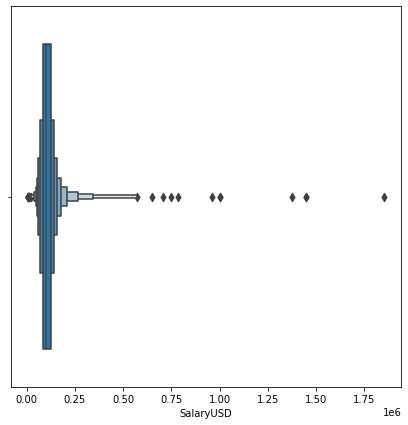

In [7]:
plt.figure(figsize = (7,7))
sns.boxenplot(x = df1["SalaryUSD"], k_depth='proportion')

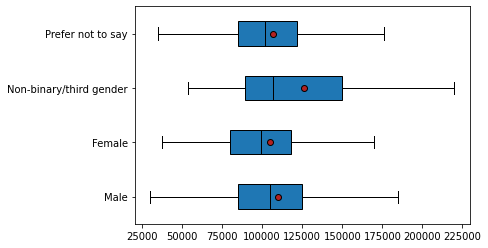

In [11]:
modalites = df1["Gender"].unique()
groupes = []
for m in modalites:
    groupes.append(df1[df1["Gender"]==m]["SalaryUSD"])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [ ]:
Le salaire median est de 110 k $ pour les hommes , environ 100 k  $ pour les femmes 

In [12]:
print(round(df1.groupby("JobTitle")["SalaryUSD"].mean()))


JobTitle
Analyst                                                                                                        82967.0
Architect                                                                                                     136769.0
DBA                                                                                                           103484.0
DBA (Development Focus - tunes queries, indexes, does deployments)                                            111726.0
DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)    107111.0
DBA (Production Focus - build & troubleshoot servers, HA/DR)                                                  107406.0
Data Scientist                                                                                                122205.0
Developer: App code (C#, JS, etc)                                                                              97776.0
Developer: Business Intelligence (SSRS,

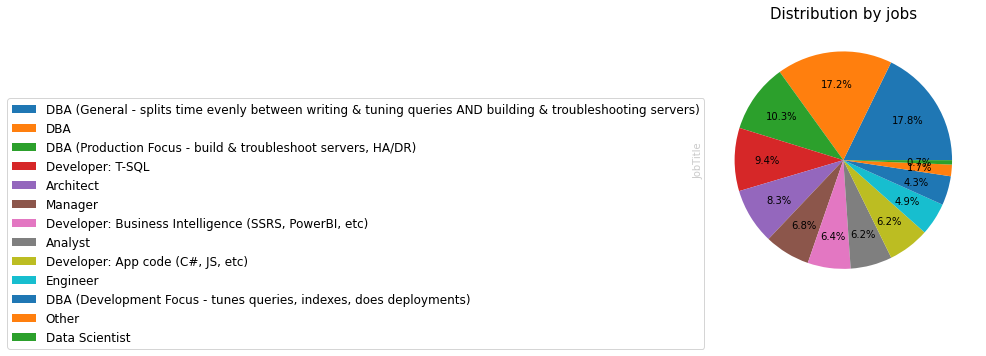

In [13]:
# exemple de pie chart avec matplotlib
labels = df1["JobTitle"].value_counts().index
values = df1["JobTitle"].value_counts()
#fig, ax = plt.subplots()
values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
plt.title("Distribution by jobs", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

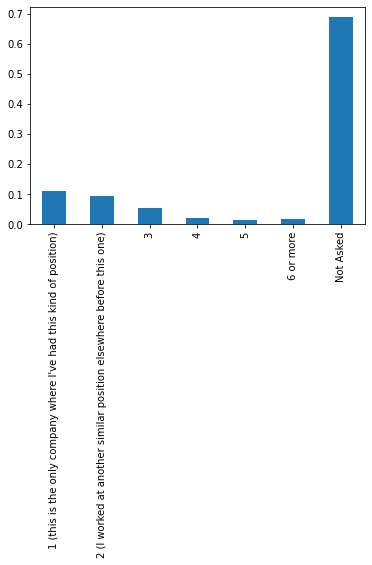

In [14]:
s = df1['HowManyCompanies'].value_counts(normalize=True).sort_index(ascending=True)
s.plot(kind='bar')
plt.show()

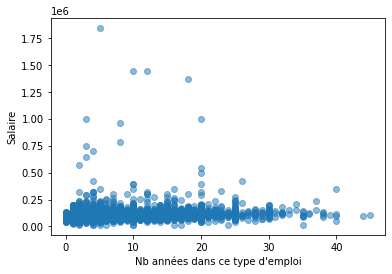

In [17]:
plt.plot(df1["YearsWithThisTypeOfJob"],df1["SalaryUSD"],'o',alpha=0.5)
plt.xlabel("Nb années dans ce type d'emploi")
plt.ylabel("Salaire")
plt.show()

on voit sur ce graph que l'experience n'as pas d'influance sur le salaire